# CS5242

## Load Data

In [1]:
from data import Data

train_data = Data(data_type='train')
test_data = Data(data_type='test')

print("Train data: x:"+ str(train_data.x.shape)+ ' y:'+str(train_data.y.shape))
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))



Loading train data 18662/18662: 100%|█████████████████████████████████████████████████████████████ [ time left: 00:00 ]
Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Train data: x:(18662, 1000, 102) y:(18662, 1)
Test data: x:(6051, 1000, 102) y:(6051, 1)


## Model

In [2]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.LSTM(10, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

## Save Checkpoint

In [3]:
import os
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    min_delta=0, 
    patience=20, 
    mode='auto', 
    restore_best_weights=True)

In [ ]:
history = model.fit(x=train_data.x, y=train_data.y, validation_split=0.1, epochs=500, callbacks=[checkpoint_callback, early_stopping_callback], verbose=2)

Train on 16795 samples, validate on 1867 samples
Epoch 1/500
16795/16795 - 44s - loss: 0.7221 - accuracy: 0.7297 - val_loss: 0.5676 - val_accuracy: 0.7724
Epoch 2/500
16795/16795 - 38s - loss: 0.5043 - accuracy: 0.7517 - val_loss: 0.5801 - val_accuracy: 0.7686
Epoch 3/500
16795/16795 - 38s - loss: 0.5108 - accuracy: 0.7463 - val_loss: 0.5651 - val_accuracy: 0.7729
Epoch 4/500
16795/16795 - 39s - loss: 0.5045 - accuracy: 0.7471 - val_loss: 0.5791 - val_accuracy: 0.7729
Epoch 5/500
16795/16795 - 38s - loss: 0.4978 - accuracy: 0.7460 - val_loss: 0.5603 - val_accuracy: 0.7761
Epoch 6/500
16795/16795 - 39s - loss: 0.5005 - accuracy: 0.7469 - val_loss: 0.6069 - val_accuracy: 0.7670
Epoch 7/500
16795/16795 - 39s - loss: 0.5002 - accuracy: 0.7428 - val_loss: 0.5938 - val_accuracy: 0.7649
Epoch 8/500
16795/16795 - 39s - loss: 0.4936 - accuracy: 0.7446 - val_loss: 0.5728 - val_accuracy: 0.7799
Epoch 9/500


## Plot Training History

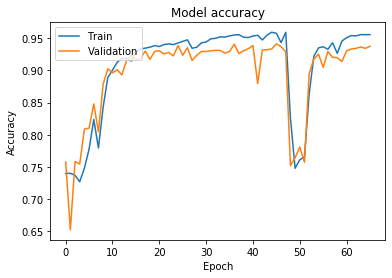

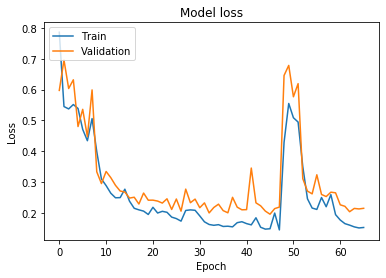

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Model Summary

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                multiple                  118272    
_________________________________________________________________
lstm_6 (LSTM)                multiple                  49408     
_________________________________________________________________
dense_6 (Dense)              multiple                  2080      
_________________________________________________________________
dense_7 (Dense)              multiple                  33        
Total params: 169,793
Trainable params: 169,793
Non-trainable params: 0
_________________________________________________________________


## Restore Weights

In [3]:
checkpoint_dir = './training_checkpoints'
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

In [4]:
test_predict = model.predict(test_data.x)

In [5]:
print(test_predict.shape)

(6051, 1)


## Save Prediction to CSV

In [5]:
import csv

output_file = 'result.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(test_predict):
        csv_writer.writerow((id, predict[0]))